In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('fifa_world_cup_2022_tweets.csv')

In [3]:
df

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative
...,...,...,...,...,...,...
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive
22520,22520,2022-11-20 00:00:03+00:00,0,DenetPro,Anderlecht confirms former Viborg FF's Jesper ...,neutral
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive
22522,22522,2022-11-20 00:00:00+00:00,11,Twitter Web App,Raphinha wants Brazil to be united at the #Wor...,positive


In [4]:
#Just in case we will drop duplicates
df.drop_duplicates(inplace=True)

In [5]:
#Checking any null entries
df.isnull( ).sum( )

Unnamed: 0         0
Date Created       0
Number of Likes    0
Source of Tweet    0
Tweet              0
Sentiment          0
dtype: int64

In [6]:
df['Date Created'] = pd.to_datetime(df['Date Created'])

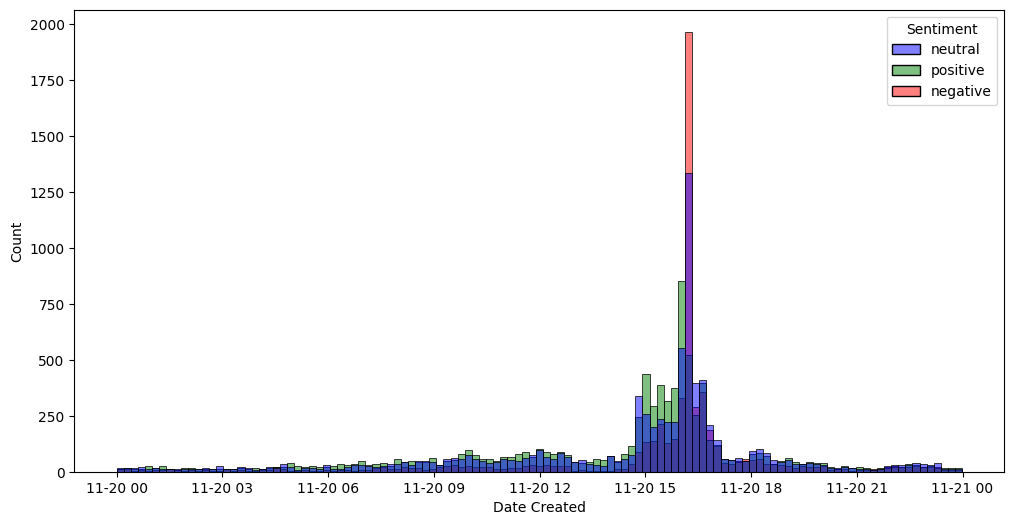

In [7]:
#Let's get a timeline of the tweets by Sentiment
plt.figure(figsize=[12,6])
ax = sns.histplot(x='Date Created', data=df,hue='Sentiment', palette=['blue','green','red'])


In [8]:
#It seems like all the tweets have been posted in the same day
years = df['Date Created'].apply(lambda date:date.year)
months = df['Date Created'].apply(lambda date:date.month)
days = df['Date Created'].apply(lambda date:date.day)
tz = df['Date Created'].apply(lambda date:date.tz)

display(years.value_counts())
display(months.value_counts())
display(days.value_counts())
display(tz.value_counts())

2022    22524
Name: Date Created, dtype: int64

11    22524
Name: Date Created, dtype: int64

20    22524
Name: Date Created, dtype: int64

UTC    22524
Name: Date Created, dtype: int64

In [9]:
#All those tweets happened in the same day and were recorded with same timezone
#We replace the time stamp to only contain the hour, minute and time

df['time_posted'] = df['Date Created'].apply(lambda date: date.hour +(date.minute/60 + date.second/3600))

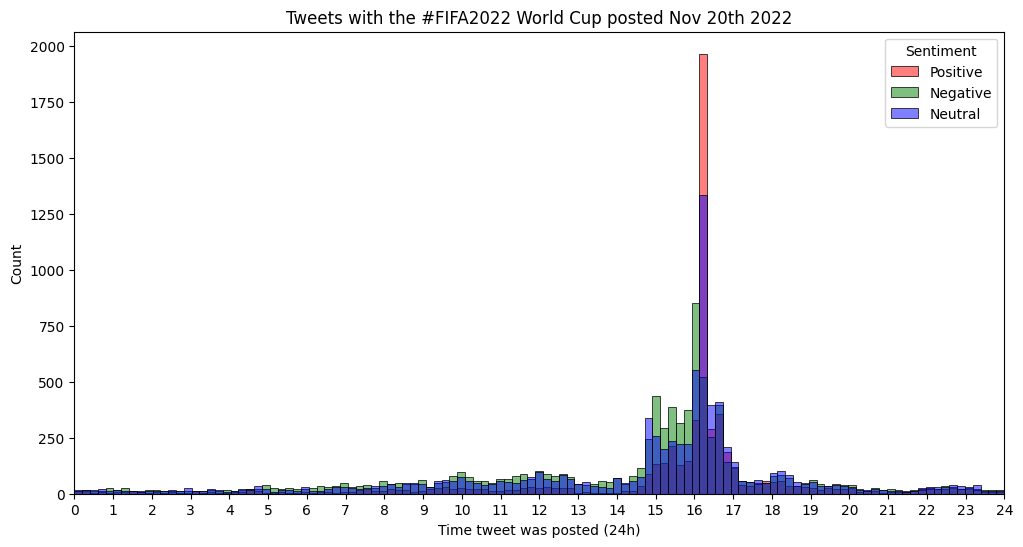

In [10]:
plt.figure(figsize=[12,6])
ax = sns.histplot(x='time_posted', data=df, hue='Sentiment', palette=['blue','green','red'])
plt.xlim(0,24)
plt.xticks(np.arange(0,25,1))
plt.xlabel('Time tweet was posted (24h)')
plt.title('Tweets with the #FIFA2022 World Cup posted Nov 20th 2022')
ax.legend(['Positive','Negative','Neutral'],title = 'Sentiment')

In [11]:
#It seems something happened during 16:00 of that day that increased the number talking about the soccer games.
#This was actually during the first game of the Cup between Qatar and Ecuador which started at 16:02.
#Ecuador scored twice at 16:18 and 16:33 which is about when the spike happened
#The time of the tweet will not happen find a pattern because they all increased by a lot during that time.

In [12]:
#We do not need the id of the tweet. There is no correlation to the sentiment
df.drop('Unnamed: 0',axis=1, inplace=True)

In [13]:
#We check the source of the tweet
df.value_counts('Source of Tweet').head(10)
#sns.countplot(data=df, x='Source of Tweet')

Source of Tweet
Twitter for iPhone          9507
Twitter for Android         6820
Twitter Web App             4505
TweetDeck                    386
Twitter for iPad             240
Qualtrics Social Connect     165
Hootsuite Inc.               146
Buffer                        71
Instagram                     62
Tweetbot for iΟS              52
dtype: int64

In [14]:
#From over 22k tweets only 7 platforms have over 100 tweets.
#We will filter our data to only include those 7 platforms
top_source = ['Twitter for iPhone','Twitter for Android','Twitter Web App','TweetDeck','Twitter for iPad',
              'Qualtrics Social Connect','Hootsuite Inc.']
              
#df = df[df['Source of Tweet'] in top_source
filtered_df = pd.DataFrame()
for source in top_source:
    filtered_df = pd.concat([filtered_df,df[df['Source of Tweet']==source]],axis=0)

In [15]:
df2 = filtered_df.copy()

In [16]:
display(len(df2))
df2.value_counts('Source of Tweet').head(10)

21769

Source of Tweet
Twitter for iPhone          9507
Twitter for Android         6820
Twitter Web App             4505
TweetDeck                    386
Twitter for iPad             240
Qualtrics Social Connect     165
Hootsuite Inc.               146
dtype: int64

<AxesSubplot: xlabel='Source of Tweet', ylabel='count'>

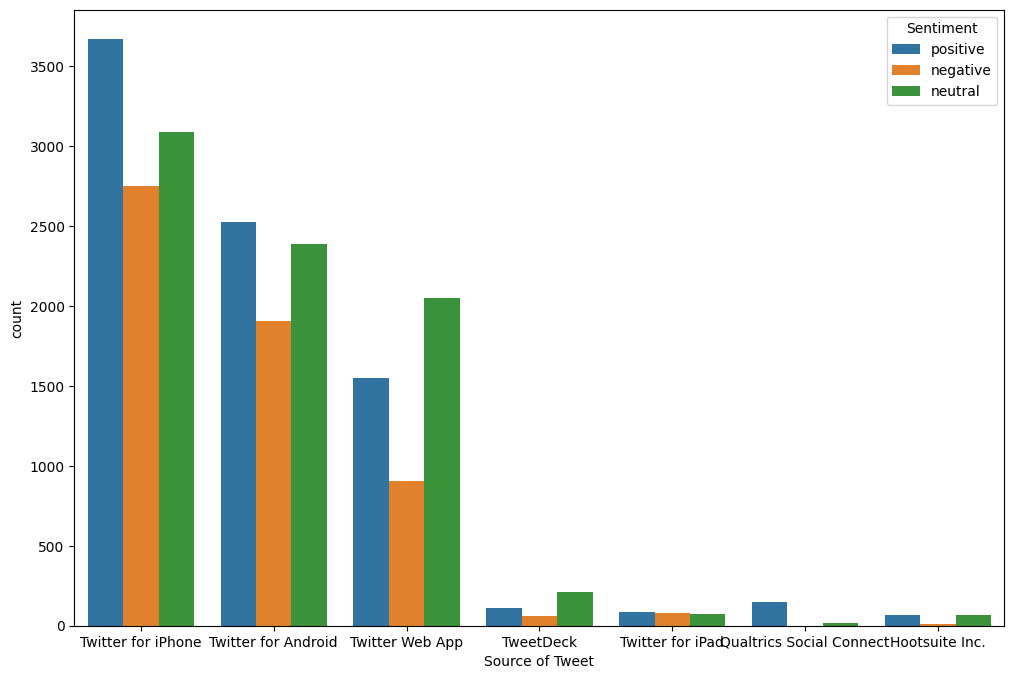

In [17]:
plt.figure(figsize=[12,8])
sns.countplot(x='Source of Tweet', data=df2, hue='Sentiment')

In [18]:
#It seems like the ratio of negative:positive:neutral sentiments 
#do not change much on the 4 most important sources and the ret barely contributes.
#We will keep using all of the dataframe

In [19]:
#From the initial 22524 data points, we now have 21796. 
#We deleted less than 1000 to clean up the important platforms

#We now create dummies for this feature

#dummies = pd.get_dummies(df['Source of Tweet'], drop_first=True)
#df = pd.concat([df,dummies],axis=1)
df.head()

,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,time_posted
0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral,23.989167
1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive,23.983611
2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive,23.978056
3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive,23.975833
4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative,23.974444


In [20]:
#We now drop the two columns we do not need anymore
#df.drop('Source of Tweet', axis=1, inplace=True)
df.drop('Date Created', axis=1, inplace=True)

In [21]:
#Before we start preprocessing our tweets we will add a length feature with the number of characters in our message
df['length'] = df['Tweet'].apply(len)
df = df.sample(frac=1)
df.head()

,Number of Likes,Source of Tweet,Tweet,Sentiment,time_posted,length
17249,0,Twitter for iPhone,@ubctvuganda #WorldCup2022 studio. Beautiful @...,positive,12.815833,101
18533,2,Twitter for Android,Game one of the world cup #WorldCup2022 is on ...,positive,11.398333,223
17237,0,Twitter Web App,@TheAthletic That is a goodlooking man ☺️ \n\...,positive,12.825278,75
6122,0,Echofon,and NOW it’s officially the first #WorldCup202...,positive,16.334444,52
2233,0,Twitter for iPhone,Drug money &gt; Oil money 🌚\n\n#WorldCup #Worl...,neutral,18.238056,80


<AxesSubplot: xlabel='length', ylabel='Count'>

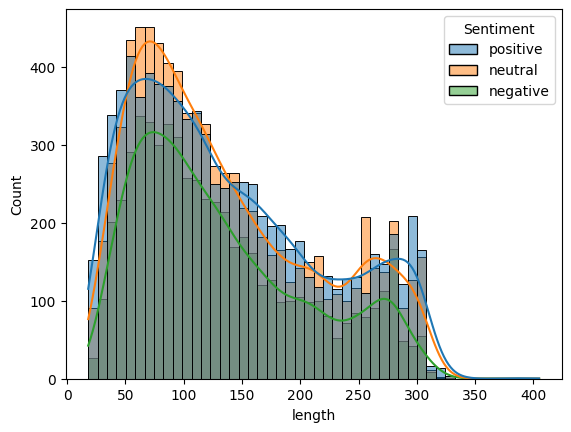

In [22]:
sns.histplot(x='length',data=df,hue='Sentiment', kde=True)

In [23]:
#All messages follow approximately the same distribution
#Now all we need to do is use NLP to work on our model
import nltk

In [24]:
#We used the funtion suggested bu Kaggle to preprocess
def preprocess(text):
    new_text = []
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

In [25]:
df['Tweet'] = df['Tweet'].apply(preprocess)

In [26]:
from nltk.corpus import stopwords
import string

In [27]:
#Cleaning punctuation and stopwords
def text_process(tweet):
    """
    1. Removes punctuation
    2. Removes stopwords
    3. Returns list of clean words
    """
    no_punc = [char for char in tweet if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    
    return [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
    

In [28]:
df['Tweet'].head().apply(text_process)

17249    [user, WorldCup2022, studio, Beautiful, user, ...
18533    [Game, one, world, cup, WorldCup2022, tonight,...
17237    [user, goodlooking, man, ☺️, Football, WorldCu...
6122         [it’s, officially, first, WorldCup2022, goal]
2233     [Drug, money, gt, Oil, money, 🌚, WorldCup, Wor...
Name: Tweet, dtype: object

In [29]:
#Start with the words vectorization by creating a bag of words (bow)
from sklearn.feature_extraction.text import CountVectorizer

In [30]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Tweet'])

In [31]:
tweets_bow = bow_transformer.transform(df['Tweet'])

In [32]:
tweets_bow.shape

(22524, 35733)

In [33]:
tweets_bow.nnz

273292

In [34]:
print(f'Percentage of entries that are nonzero in our sparse matrix is {round(100.*tweets_bow.nnz/(tweets_bow.shape[0]*tweets_bow.shape[1]),4)}%')

Percentage of entries that are nonzero in our sparse matrix is 0.034%


In [35]:
#After vectorization we atribute a TFID score based on the words contained in each message
from sklearn.feature_extraction.text import TfidfTransformer

In [36]:
tfidf_trans = TfidfTransformer().fit(tweets_bow)

In [37]:
messages_tfidf = tfidf_trans.transform(tweets_bow)

In [38]:
#Starting our model by dividing the dataset into tran and test in order to obtain metrics of our methods.
from sklearn.model_selection import train_test_split

In [39]:
tweet_train,tweet_test,sent_train,sent_test = train_test_split(df['Tweet'],df['Sentiment'],
                                                               test_size=0.2, random_state=999)

In [40]:
#Pipeline is a great way to automatize everything we did before in an easy way.
from sklearn.pipeline import Pipeline

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

In [42]:
pipeline_multi = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier', MultinomialNB())
])

pipeline_bern = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier', BernoulliNB())
])

pipeline_RFClass = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier', RandomForestClassifier(n_estimators=500))
])

In [43]:
pipeline_multi.fit(tweet_train,sent_train)
pipeline_bern.fit(tweet_train,sent_train)
pipeline_RFClass.fit(tweet_train,sent_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f916bef5090>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier(n_estimators=500))])

In [44]:
predic_multi = pipeline_multi.predict(tweet_test)
predic_bern = pipeline_bern.predict(tweet_test)
predic_RF = pipeline_RFClass.predict(tweet_test)

In [45]:
from sklearn.metrics import classification_report

In [46]:
print('Multinomial Naive Bayes results')
print(classification_report(sent_test,predic_multi))
print('Bernoulli Naive Bayes results')
print(classification_report(sent_test,predic_bern))
print('Random Forest results')
print(classification_report(sent_test,predic_RF))

Multinomial Naive Bayes results
              precision    recall  f1-score   support

    negative       0.80      0.61      0.69      1180
     neutral       0.64      0.71      0.68      1584
    positive       0.73      0.78      0.75      1741

    accuracy                           0.71      4505
   macro avg       0.72      0.70      0.71      4505
weighted avg       0.72      0.71      0.71      4505

Bernoulli Naive Bayes results
              precision    recall  f1-score   support

    negative       0.74      0.68      0.71      1180
     neutral       0.65      0.67      0.66      1584
    positive       0.74      0.76      0.75      1741

    accuracy                           0.71      4505
   macro avg       0.71      0.70      0.70      4505
weighted avg       0.71      0.71      0.71      4505

Random Forest results
              precision    recall  f1-score   support

    negative       0.75      0.59      0.66      1180
     neutral       0.60      0.72      0.65  

In [47]:
#Naive Bayes methods did better than Random Forest overall